In [94]:
# Python packages and utilities
import os
from datetime import datetime
import pandas as pd
import numpy as np
from IPython.display import display, HTML

import mlxtend

#RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem import Descriptors, rdMolDescriptors
from rdkit.Chem import Crippen
from rdkit.ML.Cluster import Butina
from rdkit import DataStructs


# scikit-learn

import sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler # This is sklearns auto-scaling function
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, Matern, ConstantKernel as C
from sklearn.feature_selection import RFECV, RFE
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pickle
from pickle import dump
import smogn

#imbalenced learn
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.over_sampling import SMOTENC
    from imblearn.over_sampling import SMOTEN
except ModuleNotFoundError:
    !pip install -U imbalanced-learn
    from imblearn.over_sampling import SMOTE
    from imblearn.over_sampling import SMOTENC
    from imblearn.over_sampling import SMOTEN

try:
    import seaborn as sns
except ModuleNotFoundError:
    !pip install seaborn
    import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt

# scikitplot library

import scikitplot as skplt

# !pip install pip install -U imbalanced-learn

# own module
from Modules import classification_metrics as cmetrics
from Modules import finger_prints as fp
from Modules import molecules_and_images as mo
from Modules import plotting_sklearn as pltsk
from Modules import workflow_functions as cwf

# utility
%load_ext autoreload
%autoreload 2
%aimport
import importlib


import logging 
logging.basicConfig(format='%(message)s')
log = logging.getLogger()
log.setLevel(logging.INFO)


random_seed = 10459
np.random.seed = random_seed
np.random.RandomState(random_seed)
log.info(f"Random seed fixed as {random_seed}")

Random seed fixed as 10459


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [39]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [40]:
data = pd.read_csv("First_set_full.csv")
data.columns = ["_".join(ent.lower().strip().split(" ")) for ent in data.columns]

In [41]:
log.info("Columns: {}".format(data.columns))

Columns: Index(['reaction', 'substrate', 'catalyst', 'solvent', 'solvent_code',
       'temperature', 'ee', 'ddg', 'paper'],
      dtype='object')


In [42]:
data

,reaction,substrate,catalyst,solvent,solvent_code,temperature,ee,ddg,paper
0,0,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...,toluene,0,-30.0,14,0.569810,Nature 2009
1,1,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...,toluene,0,-30.0,41,1.761325,Nature 2009
2,2,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,30,1.251493,Nature 2009
3,3,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,86,5.229434,Nature 2009
4,4,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,58,2.678563,Nature 2009
...,...,...,...,...,...,...,...,...,...
114,114,C=CC/N=C(C)/C1=CC=CC=C1,CN(C([C@H](NC(NC1=CC(C(F)(F)F)=CC(C(F)(F)F)=C1...,toluene,0,-75.0,0,0.000000,0ee - manually
115,115,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,[H]N(C(CNC(NC1=CC(C(F)(F)F)=CC(C(F)(F)F)=C1)=S...,toluene,0,-30.0,0,0.000000,0ee - manually
116,116,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,[H]N(C(CNC(NC1=CC(C(F)(F)F)=CC(C(F)(F)F)=C1)=S...,toluene,0,-30.0,0,0.000000,0ee - manually
117,117,C/C(C1=CC=CC=C1)=N\CC2=CC=CC=C2,[H]N(C(CNC(NC1=CC(C(F)(F)F)=CC(C(F)(F)F)=C1)=S...,toluene,0,-75.0,0,0.000000,0ee - manually


if your headings are different please change approprietly

In [43]:
substratesmiles = data["substrate"]
log.info("Substrate SMILES: {}".format(substratesmiles.head()))

catalystsmiles = data["catalyst"]
log.info("Catalyst SMILES: {}".format(catalystsmiles.head()))

reaction = data["reaction"]
log.info("Reaction Number: {}".format(reaction.head()))

ddg = data["ddg"]
log.info("DGG: {}".format(ddg.head()))

Substrate SMILES: 0         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
1    C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3
2         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
3    C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3
4         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
Name: substrate, dtype: object
Catalyst SMILES: 0    CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...
1    CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...
2    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
3    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
4    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
Name: catalyst, dtype: object
Reaction Number: 0    0
1    1
2    2
3    3
4    4
Name: reaction, dtype: int64
DGG: 0    0.569810
1    1.761325
2    1.251493
3    5.229434
4    2.678563
Name: ddg, dtype: float64


In [44]:
targets = ddg

In [45]:
targets

0      0.569810
1      1.761325
2      1.251493
3      5.229434
4      2.678563
         ...   
114    0.000000
115    0.000000
116    0.000000
117    0.000000
118    0.000000
Name: ddg, Length: 119, dtype: float64

In [46]:
features1,features_df1 = fp.morgan_fingerprints(substratesmiles)
feature_types = "catagorical" # other options 'some_catagorical', 'no_catagorical'

In [47]:
feats1 = features_df1.loc[:, (features_df1 != 0).any(axis=0)]

In [48]:
features2,features_df2 = fp.morgan_fingerprints(catalystsmiles)
feature_types2 = "catagorical" # other options 'some_catagorical', 'no_catagorical'

In [49]:
feats2 = features_df2.loc[:, (features_df2 != 0).any(axis=0)]

In [50]:
features_df = feats1.join(feats2, lsuffix="features1", rsuffix="features2")

In [51]:
features_df

,0features1,2features1,4features1,6,8features1,...,1000,1003,1007,1008features2,1016
0,1,1,1,0,0,...,0,1,0,0,1
1,1,1,1,0,0,...,0,1,0,0,1
2,1,1,1,0,0,...,0,1,0,0,1
3,1,1,1,0,0,...,0,1,0,0,1
4,1,1,1,0,0,...,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
114,1,1,1,0,0,...,0,1,0,0,1
115,1,1,1,0,0,...,0,0,0,0,1
116,1,1,1,0,0,...,0,0,0,0,1
117,1,1,1,0,0,...,0,0,0,0,1


Define here which regressors you would like to use and their parameters

In [52]:
# source:    https://www.kaggle.com/ankitjha/comparing-regression-models

kfold_reg_names = ["LassoCV","KNeighborsRegressor", "Decision Tree Regressor", "SVR", "Bayesian Regr", "Gaussian Process Regressor"]
kfold_regressors = [
    LassoCV(random_state=random_seed, cv=10,selection='random',normalize=True,max_iter=1000000),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=random_seed),
    svm.SVR(),
    linear_model.BayesianRidge(n_iter=100000,normalize=True),
    GaussianProcessRegressor()]

kernel = DotProduct() + WhiteKernel()
kfold_regressors_parameters = {
    "LassoCV":{},
    "KNeighborsRegressor": {"n_neighbors": [ent for ent in range(2, 10, 1)]},
    "Decision Tree Regressor": {"max_depth": [2, 3, 4, 5, 7, 10]},
    "SVR": {"kernel":['linear', 'poly', 'rbf'], "degree":[2,3], "gamma":['auto','scale'], "coef0":[0,1], 'C':[100]},    
    "Bayesian Regr":{'alpha_1':[1e-06, 10], 'alpha_2': [1e-06,10],'lambda_1':[1e-06,10], 'lambda_2': [1e-06,10]},
    "Gaussian Process Regressor": {},    
}

In [53]:
%%capture
cwf.kfold_test_regressor_with_optimization(features_df,targets , kfold_regressors, kfold_regressors_parameters, scale=False, cv=5, n_repeats=10, rgs_names=kfold_reg_names)

Features: Index([   '0features1',    '2features1',    '4features1',               6,
          '8features1',               9,              15,              16,
                    30,              31,
       ...
        '941features2',             951,             955,  '966features2',
        '977features2',            1000,            1003,            1007,
       '1008features2',            1016],
      dtype='object', length=227)
Starting regression

-----
Begin LassoCV
-----

Directory LassoCV already exists will be overwritten
----- LassoCV: Fold 0 -----
[1, 3, 9, 25, 26, 36, 47, 52, 65, 99, 107, 114]
	Train indx [  0   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  27  28  29  30  31  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
 100 101


	score (LassoCV): 0.3253035016288758
----- LassoCV: Fold 2 -----
[10, 13, 29, 30, 49, 55, 93, 95, 102, 103, 116, 118]
	Train indx [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  50  51  52  53  54  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  96  97
  98  99 100 101 104 105 106 107 108 109 110 111 112 113 114 115 117]
	Test indx: [ 10  13  29  30  49  55  93  95 102 103 116 118]
	Best parameters; {}
	-0.3794 (+/-0.9494) for {}

	----- Predicting using: LassoCV -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
1             1           1           1  0           0  0   0   0   0   1   
2             1           1           1  0 


	score (LassoCV): 0.7415813538707552
----- LassoCV: Fold 4 -----
[2, 12, 23, 37, 40, 44, 56, 61, 79, 84, 85, 92]
	Train indx [  0   1   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  41  42  43  45  46  47  48  49  50  51  52  53  54  55  57  58  59  60
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  80
  81  82  83  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 2 12 23 37 40 44 56 61 79 84 85 92]
	Best parameters; {}
	-3.3170 (+/-5.6340) for {}

	----- Predicting using: LassoCV -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
1             1           1           1  0           0  0   0   0   0   1   
3             1           1           1  0           0  0   


	score (LassoCV): 0.9206451857416879
----- LassoCV: Fold 6 -----
[14, 19, 27, 35, 43, 59, 60, 77, 105, 110, 112, 115]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 106 107 108 109 111 113 114 116 117 118]
	Test indx: [ 14  19  27  35  43  59  60  77 105 110 112 115]
	Best parameters; {}
	-0.5962 (+/-1.3709) for {}

	----- Predicting using: LassoCV -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
1             1           1           1  0           0  0   0   0   0   1   
2             1           1           1  0 


	score (LassoCV): 0.8038804494192264
----- LassoCV: Fold 8 -----
[4, 5, 20, 34, 39, 41, 42, 83, 94, 97, 109, 117]
	Train indx [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  40
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  95  96  98  99
 100 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 118]
	Test indx: [  4   5  20  34  39  41  42  83  94  97 109 117]
	Best parameters; {}
	-0.9710 (+/-2.1457) for {}

	----- Predicting using: LassoCV -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
1             1           1           1  0           0  0   0   0   0   1   
2             1           1           1  0     


	score (LassoCV): 0.5924004384965493
The average scores are: 1.0589500892814907, and the std scores are: 0.16649073903794767

-----
Begin KNeighborsRegressor
-----

Directory KNeighborsRegressor already exists will be overwritten
----- KNeighborsRegressor: Fold 0 -----
[1, 3, 9, 25, 26, 36, 47, 52, 65, 99, 107, 114]
	Train indx [  0   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  27  28  29  30  31  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 108 109 110 111 112 113 115 116 117 118]
	Test indx: [  1   3   9  25  26  36  47  52  65  99 107 114]
	Best parameters; {'n_neighbors': 7}
	-1.7893 (+/-2.8603) for {'n_neighbors': 2}
	-1.6440 (+/-3.2295) for {'n_neighbors': 3}
	-1.4728 (+/-2.7637) for {'n_neighbors': 4}
	-1


	score (KNeighborsRegressor): 0.06332315059733218
----- KNeighborsRegressor: Fold 2 -----
[10, 13, 29, 30, 49, 55, 93, 95, 102, 103, 116, 118]
	Train indx [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  50  51  52  53  54  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  96  97
  98  99 100 101 104 105 106 107 108 109 110 111 112 113 114 115 117]
	Test indx: [ 10  13  29  30  49  55  93  95 102 103 116 118]
	Best parameters; {'n_neighbors': 2}
	-0.1938 (+/-0.4438) for {'n_neighbors': 2}
	-0.2716 (+/-0.7807) for {'n_neighbors': 3}
	-0.4543 (+/-1.1036) for {'n_neighbors': 4}
	-0.4978 (+/-1.2821) for {'n_neighbors': 5}
	-0.6306 (+/-1.3682) for {'n_neighbors': 6}
	-0.6553 (+/-1.2773) for {'n_neighbors': 7}
	-0.6187 (+/-1.2681) for {'n_neighbors': 8}
	-


	score (KNeighborsRegressor): 0.7941771528495722
----- KNeighborsRegressor: Fold 4 -----
[2, 12, 23, 37, 40, 44, 56, 61, 79, 84, 85, 92]
	Train indx [  0   1   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  41  42  43  45  46  47  48  49  50  51  52  53  54  55  57  58  59  60
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  80
  81  82  83  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 2 12 23 37 40 44 56 61 79 84 85 92]
	Best parameters; {'n_neighbors': 2}
	-1.1810 (+/-2.1350) for {'n_neighbors': 2}
	-2.1400 (+/-4.1483) for {'n_neighbors': 3}
	-2.8121 (+/-5.5038) for {'n_neighbors': 4}
	-3.5488 (+/-6.7756) for {'n_neighbors': 5}
	-3.6725 (+/-6.9532) for {'n_neighbors': 6}
	-3.7622 (+/-7.0379) for {'n_neighbors': 7}
	-3.6368 (+/-6.8314) for {'n_neighbors': 8}
	-3.6593 (+/-7.0186)


	score (KNeighborsRegressor): 0.8354032821165686
----- KNeighborsRegressor: Fold 6 -----
[14, 19, 27, 35, 43, 59, 60, 77, 105, 110, 112, 115]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 106 107 108 109 111 113 114 116 117 118]
	Test indx: [ 14  19  27  35  43  59  60  77 105 110 112 115]
	Best parameters; {'n_neighbors': 2}
	-0.1430 (+/-0.5401) for {'n_neighbors': 2}
	-0.3031 (+/-0.9120) for {'n_neighbors': 3}
	-0.5410 (+/-1.3894) for {'n_neighbors': 4}
	-0.6662 (+/-1.6998) for {'n_neighbors': 5}
	-0.7486 (+/-1.7531) for {'n_neighbors': 6}
	-0.7578 (+/-1.7020) for {'n_neighbors': 7}
	-0.8531 (+/-1.8527) for {'n_neighbors': 8}
	-0


	score (KNeighborsRegressor): 0.7781523217039207
----- KNeighborsRegressor: Fold 8 -----
[4, 5, 20, 34, 39, 41, 42, 83, 94, 97, 109, 117]
	Train indx [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  40
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  95  96  98  99
 100 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 118]
	Test indx: [  4   5  20  34  39  41  42  83  94  97 109 117]
	Best parameters; {'n_neighbors': 2}
	-0.3960 (+/-0.7545) for {'n_neighbors': 2}
	-0.8246 (+/-1.9355) for {'n_neighbors': 3}
	-1.0528 (+/-2.4984) for {'n_neighbors': 4}
	-1.0240 (+/-2.4536) for {'n_neighbors': 5}
	-1.1497 (+/-2.5179) for {'n_neighbors': 6}
	-1.2047 (+/-2.5413) for {'n_neighbors': 7}
	-1.1964 (+/-2.5217) for {'n_neighbors': 8}
	-1.191


	score (KNeighborsRegressor): 0.7519285850076138
The average scores are: 1.1265560549219695, and the std scores are: 0.21180042640071928

-----
Begin Decision Tree Regressor
-----

Directory Decision_Tree_Regressor already exists will be overwritten
----- Decision_Tree_Regressor: Fold 0 -----
[1, 3, 9, 25, 26, 36, 47, 52, 65, 99, 107, 114]
	Train indx [  0   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  27  28  29  30  31  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 108 109 110 111 112 113 115 116 117 118]
	Test indx: [  1   3   9  25  26  36  47  52  65  99 107 114]
	Best parameters; {'max_depth': 2}
	-0.9740 (+/-1.4577) for {'max_depth': 2}
	-1.0376 (+/-1.6748) for {'max_depth': 3}
	-2.2129 (+/-3.5124) for {'ma


	score (Decision_Tree_Regressor): -0.15403842564524406
----- Decision_Tree_Regressor: Fold 2 -----
[10, 13, 29, 30, 49, 55, 93, 95, 102, 103, 116, 118]
	Train indx [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  50  51  52  53  54  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  96  97
  98  99 100 101 104 105 106 107 108 109 110 111 112 113 114 115 117]
	Test indx: [ 10  13  29  30  49  55  93  95 102 103 116 118]
	Best parameters; {'max_depth': 5}
	-0.4523 (+/-1.0264) for {'max_depth': 2}
	-0.4403 (+/-1.2073) for {'max_depth': 3}
	-0.2355 (+/-0.9107) for {'max_depth': 4}
	-0.2222 (+/-0.9014) for {'max_depth': 5}
	-0.8145 (+/-1.1769) for {'max_depth': 7}
	-0.5789 (+/-1.0323) for {'max_depth': 10}

	----- Predicting using: Decision_Tree_Regressor 


	score (Decision_Tree_Regressor): 0.7697570393750333
----- Decision_Tree_Regressor: Fold 4 -----
[2, 12, 23, 37, 40, 44, 56, 61, 79, 84, 85, 92]
	Train indx [  0   1   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  41  42  43  45  46  47  48  49  50  51  52  53  54  55  57  58  59  60
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  80
  81  82  83  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 2 12 23 37 40 44 56 61 79 84 85 92]
	Best parameters; {'max_depth': 2}
	-2.6137 (+/-5.1159) for {'max_depth': 2}
	-3.3532 (+/-5.3539) for {'max_depth': 3}
	-3.5552 (+/-5.1363) for {'max_depth': 4}
	-3.2219 (+/-4.3017) for {'max_depth': 5}
	-3.2767 (+/-4.1446) for {'max_depth': 7}
	-3.4819 (+/-4.8960) for {'max_depth': 10}

	----- Predicting using: Decision_Tree_Regressor -----
	Xtrain:     


	score (Decision_Tree_Regressor): 0.9139418571379301
----- Decision_Tree_Regressor: Fold 6 -----
[14, 19, 27, 35, 43, 59, 60, 77, 105, 110, 112, 115]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 106 107 108 109 111 113 114 116 117 118]
	Test indx: [ 14  19  27  35  43  59  60  77 105 110 112 115]
	Best parameters; {'max_depth': 4}
	-0.7343 (+/-1.2027) for {'max_depth': 2}
	-0.9553 (+/-1.2408) for {'max_depth': 3}
	-0.6089 (+/-1.0962) for {'max_depth': 4}
	-0.6955 (+/-0.9836) for {'max_depth': 5}
	-0.7644 (+/-0.9268) for {'max_depth': 7}
	-0.8981 (+/-1.0761) for {'max_depth': 10}

	----- Predicting using: Decision_Tree_Regressor --


	score (Decision_Tree_Regressor): 0.8258756898093305
----- Decision_Tree_Regressor: Fold 8 -----
[4, 5, 20, 34, 39, 41, 42, 83, 94, 97, 109, 117]
	Train indx [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  40
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  95  96  98  99
 100 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 118]
	Test indx: [  4   5  20  34  39  41  42  83  94  97 109 117]
	Best parameters; {'max_depth': 4}
	-1.1156 (+/-2.0064) for {'max_depth': 2}
	-1.1694 (+/-1.9773) for {'max_depth': 3}
	-0.9273 (+/-1.6286) for {'max_depth': 4}
	-1.0241 (+/-1.7427) for {'max_depth': 5}
	-1.1103 (+/-1.8901) for {'max_depth': 7}
	-1.1487 (+/-1.7894) for {'max_depth': 10}

	----- Predicting using: Decision_Tree_Regressor -----



	score (Decision_Tree_Regressor): 0.6125763576702721
The average scores are: 1.0919677195498967, and the std scores are: 0.25151550828575187

-----
Begin SVR
-----

Directory SVR already exists will be overwritten
----- SVR: Fold 0 -----
[1, 3, 9, 25, 26, 36, 47, 52, 65, 99, 107, 114]
	Train indx [  0   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  27  28  29  30  31  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 108 109 110 111 112 113 115 116 117 118]
	Test indx: [  1   3   9  25  26  36  47  52  65  99 107 114]
	Best parameters; {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.9363 (+/-1.7036) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.8295 (+/-1.54


	score (SVR): 0.892262536314131
----- SVR: Fold 1 -----
[6, 18, 21, 33, 46, 50, 57, 67, 70, 71, 81, 98]
	Train indx [  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  19
  20  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39
  40  41  42  43  44  45  47  48  49  51  52  53  54  55  56  58  59  60
  61  62  63  64  65  66  68  69  72  73  74  75  76  77  78  79  80  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 6 18 21 33 46 50 57 67 70 71 81 98]
	Best parameters; {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
	-1.6675 (+/-3.4432) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-2.7010 (+/-5.6857) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-1.3284 (+/-3.1865) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-1.6675 (+/-3.4432

	Best parameters; {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.1683 (+/-0.8085) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.4037 (+/-1.0606) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.1648 (+/-0.7734) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.1683 (+/-0.8085) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	-0.3612 (+/-0.6505) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
	-0.2753 (+/-0.6646) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	-0.1683 (+/-0.8085) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
	-0.5726 (+/-1.2799) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-0.1648 (+/-0.7734) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.1683 (+/-0.8085) for {'C': 100, 'coef

	-0.3917 (+/-1.3355) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.0901 (+/-0.9027) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-1.4643 (+/-2.6270) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	-0.1275 (+/-0.4859) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
	-0.1409 (+/-0.5733) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	-1.4643 (+/-2.6270) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
	-0.7794 (+/-1.7667) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-0.0901 (+/-0.9027) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
	-1.4643 (+/-2.6270) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
	-0.1728 (+/-0.4701) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
	-0.1409 (+/-0.5733) for {'C': 1

	-3.2766 (+/-4.6267) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	-1.5979 (+/-2.3228) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
	-1.3869 (+/-2.4732) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	-3.2766 (+/-4.6267) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
	-3.8681 (+/-7.2854) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-1.6484 (+/-3.0153) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
	-3.2766 (+/-4.6267) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
	-1.3474 (+/-2.0145) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
	-1.3869 (+/-2.4732) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
	-3.2766 (+/-4.6267) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-1.7511 (+/-2.9799) for {'C'

	-0.2560 (+/-0.7665) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	-1.5395 (+/-2.3173) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
	-1.2076 (+/-2.3600) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-0.3443 (+/-1.2623) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
	-1.5395 (+/-2.3173) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
	-0.3345 (+/-0.6318) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
	-0.2560 (+/-0.7665) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
	-1.5395 (+/-2.3173) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.3886 (+/-1.3154) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.3443 (+/-1.2623) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-1.5395 (+/-2.3173) for {'C': 100

	-0.8063 (+/-1.5851) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-0.2586 (+/-1.1211) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.7800 (+/-1.4366) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
	-0.0776 (+/-0.4291) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
	-0.0675 (+/-0.5875) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
	-0.7800 (+/-1.4366) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.2605 (+/-1.1503) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.2586 (+/-1.1211) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.7800 (+/-1.4366) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	-0.0186 (+/-0.5793) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
	-0.0675 (+/-0.5875) for {'C': 1

	-1.3053 (+/-2.5753) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
	-0.5937 (+/-1.1336) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
	-0.5448 (+/-1.4145) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
	-1.3053 (+/-2.5753) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.6092 (+/-1.8189) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.5904 (+/-1.7744) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-1.3053 (+/-2.5753) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	-0.4416 (+/-1.0375) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
	-0.5448 (+/-1.4145) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	-1.3053 (+/-2.5753) for {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
	-0.5439 (+/-1.5194) for {'C'

	-0.4167 (+/-0.8992) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
	-1.1430 (+/-1.7769) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.4026 (+/-1.2492) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.4163 (+/-1.2571) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-1.1430 (+/-1.7769) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	-0.3775 (+/-0.7485) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
	-0.4167 (+/-0.8992) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	-1.1430 (+/-1.7769) for {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
	-0.4499 (+/-1.2122) for {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-0.4163 (+/-1.2571) for {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
	-1.1430 (+/-1.7769) for {'C': 100

	-0.3453 (+/-1.4071) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.3631 (+/-1.4168) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.5582 (+/-1.5437) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	-0.2421 (+/-0.8318) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
	-0.3282 (+/-1.0662) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	-0.5582 (+/-1.5437) for {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
	-0.3673 (+/-1.1139) for {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-0.3631 (+/-1.4168) for {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.5582 (+/-1.5437) for {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
	-0.1603 (+/-0.7291) for {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
	-0.3282 (+/-1.0662) for {'C': 1

	-0.7140 (+/-2.0389) for {'alpha_1': 10, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 10}
	-0.8762 (+/-2.0556) for {'alpha_1': 10, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.7895 (+/-2.0294) for {'alpha_1': 10, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 10}

	----- Predicting using: Bayesian_Regr -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
2             1           1           1  0           0  0   0   0   0   1   
4             1           1           1  0           0  0   0   0   0   1   
5             1           1           1  0           0  0   0   0   0   1   
6             1           1           1  0           0  0   0   0   0   1   
..          ...         ...         ... ..         ... ..  ..  ..  ..  ..   
113           1           1           1  0           0  0   0   0   0   0   
115           1           1           1  0           0  0  


	score (Bayesian_Regr): 0.1246258331900929
----- Bayesian_Regr: Fold 2 -----
[10, 13, 29, 30, 49, 55, 93, 95, 102, 103, 116, 118]
	Train indx [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  50  51  52  53  54  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  96  97
  98  99 100 101 104 105 106 107 108 109 110 111 112 113 114 115 117]
	Test indx: [ 10  13  29  30  49  55  93  95 102 103 116 118]
	Best parameters; {'alpha_1': 10, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-0.3811 (+/-1.1448) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.3742 (+/-1.1358) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-0.7032 (+/-1.7574) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10

	-0.4820 (+/-1.5635) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 10}
	-0.4873 (+/-1.5312) for {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.4685 (+/-1.4632) for {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 10}
	-0.8645 (+/-2.1946) for {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.5388 (+/-1.6595) for {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 10}
	-0.5437 (+/-1.3933) for {'alpha_1': 10, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.5832 (+/-1.3907) for {'alpha_1': 10, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-0.4903 (+/-1.5404) for {'alpha_1': 10, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.4718 (+/-1.4494) for {'alpha_1': 10, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 10}
	-0.4931 (+/-1.4342) for {'alpha_1': 10, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.5094 (+/-1.4020) for {'alpha_1': 10, 'alpha_2': 10, 'lam

	-4.7580 (+/-8.4685) for {'alpha_1': 10, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 1e-06}
	-3.5190 (+/-5.8759) for {'alpha_1': 10, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 10}

	----- Predicting using: Bayesian_Regr -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
1             1           1           1  0           0  0   0   0   0   1   
3             1           1           1  0           0  0   0   0   0   1   
4             1           1           1  0           0  0   0   0   0   1   
5             1           1           1  0           0  0   0   0   0   1   
..          ...         ...         ... ..         ... ..  ..  ..  ..  ..   
114           1           1           1  0           0  0   0   0   0   0   
115           1           1           1  0           0  0   0   0   0   1   
116           1           1           1  0           0  0   0   0   0   1


	score (Bayesian_Regr): 0.882616928123992
----- Bayesian_Regr: Fold 6 -----
[14, 19, 27, 35, 43, 59, 60, 77, 105, 110, 112, 115]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 106 107 108 109 111 113 114 116 117 118]
	Test indx: [ 14  19  27  35  43  59  60  77 105 110 112 115]
	Best parameters; {'alpha_1': 10, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-0.4632 (+/-1.4172) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.4311 (+/-1.3897) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-0.8486 (+/-2.0456) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10,

	-1.8645 (+/-4.0706) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-1.4431 (+/-3.3017) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 10}
	-1.4168 (+/-3.2497) for {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-1.3693 (+/-3.1740) for {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 10}
	-1.9082 (+/-4.0484) for {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 1e-06}
	-1.5163 (+/-3.3917) for {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 10}
	-1.3458 (+/-3.1287) for {'alpha_1': 10, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-1.3526 (+/-3.1250) for {'alpha_1': 10, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-1.4583 (+/-3.3495) for {'alpha_1': 10, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-1.3636 (+/-3.1798) for {'alpha_1': 10, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 10}
	-1.3599 (+/-3.1563) for {'alpha_1': 10, 'alpha_2': 10, '

	-0.8428 (+/-2.0134) for {'alpha_1': 10, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.8310 (+/-1.9885) for {'alpha_1': 10, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 10}
	-1.5401 (+/-3.3528) for {'alpha_1': 10, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.8906 (+/-2.1061) for {'alpha_1': 10, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 10}

	----- Predicting using: Bayesian_Regr -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
1             1           1           1  0           0  0   0   0   0   1   
2             1           1           1  0           0  0   0   0   0   1   
3             1           1           1  0           0  0   0   0   0   1   
6             1           1           1  0           0  0   0   0   0   1   
..          ...         ...         ... ..         ... ..  ..  ..  ..  ..   
113           1           1           1  0


	score (Bayesian_Regr): 0.6090214692143386
The average scores are: 1.0808318768105054, and the std scores are: 0.20419831787961004

-----
Begin Gaussian Process Regressor
-----

Directory Gaussian_Process_Regressor already exists will be overwritten
----- Gaussian_Process_Regressor: Fold 0 -----
[1, 3, 9, 25, 26, 36, 47, 52, 65, 99, 107, 114]
	Train indx [  0   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  27  28  29  30  31  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 108 109 110 111 112 113 115 116 117 118]
	Test indx: [  1   3   9  25  26  36  47  52  65  99 107 114]
	Best parameters; {}
	-6.7740 (+/-7.0860) for {}

	----- Predicting using: Gaussian_Process_Regressor -----
	Xtrain:      0features1  2features1 


	score (Gaussian_Process_Regressor): -2.3811860585078652
----- Gaussian_Process_Regressor: Fold 2 -----
[10, 13, 29, 30, 49, 55, 93, 95, 102, 103, 116, 118]
	Train indx [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  50  51  52  53  54  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  96  97
  98  99 100 101 104 105 106 107 108 109 110 111 112 113 114 115 117]
	Test indx: [ 10  13  29  30  49  55  93  95 102 103 116 118]
	Best parameters; {}
	-6.3605 (+/-6.3692) for {}

	----- Predicting using: Gaussian_Process_Regressor -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
1             1           1           1  0           0  0   0 


	score (Gaussian_Process_Regressor): 0.11775328208366254
----- Gaussian_Process_Regressor: Fold 4 -----
[2, 12, 23, 37, 40, 44, 56, 61, 79, 84, 85, 92]
	Train indx [  0   1   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  41  42  43  45  46  47  48  49  50  51  52  53  54  55  57  58  59  60
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  80
  81  82  83  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 2 12 23 37 40 44 56 61 79 84 85 92]
	Best parameters; {}
	-6.5373 (+/-7.1619) for {}

	----- Predicting using: Gaussian_Process_Regressor -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
1             1           1           1  0           0  0   0   0   0   1   
3 


	score (Gaussian_Process_Regressor): 0.5519070166074819
----- Gaussian_Process_Regressor: Fold 6 -----
[14, 19, 27, 35, 43, 59, 60, 77, 105, 110, 112, 115]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 106 107 108 109 111 113 114 116 117 118]
	Test indx: [ 14  19  27  35  43  59  60  77 105 110 112 115]
	Best parameters; {}
	-6.2279 (+/-5.9640) for {}

	----- Predicting using: Gaussian_Process_Regressor -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
1             1           1           1  0           0  0   0  


	score (Gaussian_Process_Regressor): -1.20545536726272
----- Gaussian_Process_Regressor: Fold 8 -----
[4, 5, 20, 34, 39, 41, 42, 83, 94, 97, 109, 117]
	Train indx [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  40
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  95  96  98  99
 100 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 118]
	Test indx: [  4   5  20  34  39  41  42  83  94  97 109 117]
	Best parameters; {}
	-7.2279 (+/-7.1009) for {}

	----- Predicting using: Gaussian_Process_Regressor -----
	Xtrain:      0features1  2features1  4features1  6  8features1  9  15  16  30  31  \
0             1           1           1  0           0  0   0   0   0   1   
1             1           1           1  0           0  0   0   0   


	score (Gaussian_Process_Regressor): -0.0008008552909664068
The average scores are: 1.920251731730615, and the std scores are: 0.6728745599452022


In [54]:
directory_names = cwf.directory_names(kfold_reg_names)

In [55]:
data = cwf.build_data_from_directory_regr(directory_names[0], max_folds=10)

Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv



-----
Analyzing predictions for model LassoCV
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.764112505027161, MAE: 1.0579091485545535, MSE: 1.9165238778180251,R2: 0.7628414772775959
-----


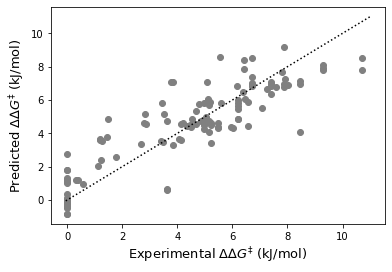


-----
Analyzing predictions for model KNeighborsRegressor
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.7190904514747163, MAE: 1.1279787611806724, MSE: 2.4177957287830205,R2: 0.7008120431374223
-----


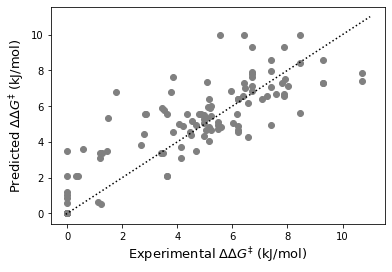


-----
Analyzing predictions for model Decision_Tree_Regressor
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.7123418693876999, MAE: 1.0920840447086113, MSE: 2.331642143022195,R2: 0.7114730410841513
-----


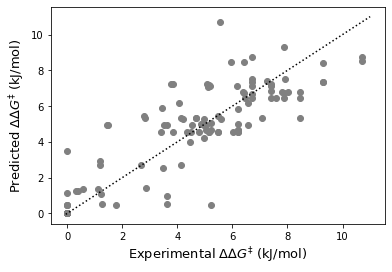


-----
Analyzing predictions for model SVR
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.750496514412693, MAE: 1.027123983655862, MSE: 2.0412031592079827,R2: 0.7474131517916659
-----


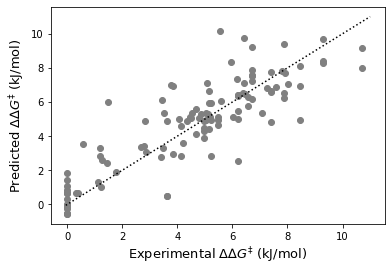


-----
Analyzing predictions for model Bayesian_Regr
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.751772313652387, MAE: 1.0799878822704574, MSE: 2.0221710241906767,R2: 0.7497682662137708
-----


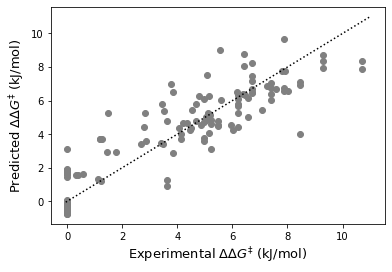


-----
Analyzing predictions for model Gaussian_Process_Regressor
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.2439236004989116, MAE: 1.9218373309677699, MSE: 8.340198020467714,R2: -0.03205029931500247
-----


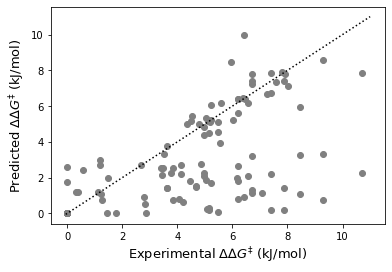

In [56]:
cwf.metrics_for_regression(directories=directory_names)

# Now first we split 90%-10% (train-test)


In [57]:
data = pd.read_csv("First_set_full.csv")
data.columns = ["_".join(ent.lower().strip().split(" ")) for ent in data.columns]

We have used a standard test set, but if you want a random one you can just use the train_test_split function from sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [58]:
test_reactions = [49, 33,19, 1, 6, 51, 66, 47, 58]

In [59]:
reaction = data["reaction"]
log.info("Reaction Number: {}".format(reaction.head()))

Reaction Number: 0    0
1    1
2    2
3    3
4    4
Name: reaction, dtype: int64


In [60]:
train_data = data.drop(labels =test_reactions, axis=0,inplace = False)

In [61]:
test_data = pd.DataFrame()
test_data = data.iloc[test_reactions]

In [62]:
substratesmiles_train = train_data["substrate"]
log.info("Substrate SMILES: {}".format(substratesmiles_train.head()))

catalystsmiles_train = train_data["catalyst"]
log.info("Catalyst SMILES: {}".format(catalystsmiles_train.head()))

ddg_train = train_data["ddg"]
log.info("DGG: {}".format(ddg_train.head()))

Substrate SMILES: 0         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
2         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
3    C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3
4         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
5    C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3
Name: substrate, dtype: object
Catalyst SMILES: 0    CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...
2    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
3    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
4    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
5    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
Name: catalyst, dtype: object
DGG: 0    0.569810
2    1.251493
3    5.229434
4    2.678563
5    5.952686
Name: ddg, dtype: float64


In [63]:
target_train = ddg_train

In [64]:
substratesmiles_test = test_data["substrate"]
log.info("Substrate SMILES: {}".format(substratesmiles_test.head()))

catalystsmiles_test = test_data["catalyst"]
log.info("Catalyst SMILES: {}".format(catalystsmiles_test.head()))

ddg_test = test_data["ddg"]
log.info("DGG: {}".format(ddg_test.head()))

Substrate SMILES: 49     COC(C=C1)=CC=C1/C=N/C(C2=CC=CC=C2)C3=CC=CC=C3
33                 C=CC/N=C(C)/C1=CC(C=CC=C2)=C2C=C1
19    N#CC(C=C1)=CC=C1/C=N/C(C2=CC=CC=C2)C3=CC=CC=C3
1        C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3
6             CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
Name: substrate, dtype: object
Catalyst SMILES: 49    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
33    O=C([C@@H](C(C)(C)C)NC(N[C@@H]1[C@@H](/N=C/C2=...
19    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
1     CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...
6     CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
Name: catalyst, dtype: object
DGG: 49    7.867979
33    4.685297
19    6.705437
1     1.761325
6     4.125533
Name: ddg, dtype: float64


In [65]:
target_test = ddg_test

Generating Fingerprints for the training set

First for the substrates

In [66]:
features1_train,features_df1_train = fp.morgan_fingerprints(substratesmiles_train)

In [67]:
feats1 = features_df1_train.loc[:, (features_df1_train != 0).any(axis=0)]

Then for catalysts

In [69]:
features2_train,features_df2_train = fp.morgan_fingerprints(catalystsmiles_train)

In [70]:
feats2 = features_df2_train.loc[:, (features_df2_train != 0).any(axis=0)]

In [71]:
features_df_train = feats1.join(feats2, lsuffix="features1", rsuffix="features2")

# Handling the Test Set


In [72]:
features1_test,features_df1_test = fp.morgan_fingerprints(substratesmiles_test)

In [73]:
a = features_df1_test.columns.intersection(feats1.columns)

In [74]:
feat1_test = features_df1_test.drop(columns=[col for col in features_df1_test if col not in a])

In [75]:
features2_test,features_df2_test = fp.morgan_fingerprints(catalystsmiles_test)

In [76]:
b = features_df2_test.columns.intersection(feats2.columns)

In [77]:
feat2_test = features_df2_test.drop(columns=[col for col in features_df2_test if col not in b])

In [78]:
features_df_test = feat1_test.join(feat2_test, lsuffix="features1", rsuffix="features2")

In the lines above we have generated the fingerprints again. you don't have to do this, you could just split the features_df drataframe according to your needs.

# Define Xtrain, Xtest, Ytrain, Ytest


In [79]:
Xtrain = features_df_train
Xtest = features_df_test
Ytrain = target_train
Ytest = target_test

You can skip regressors that did not perform well in the previous step. or not, up to you

In [84]:
kfold_reg_names = ["LassoCV","KNeighborsRegressor", "Decision Tree Regressor", "SVR", "Bayesian Regr", "Gaussian Process Regressor"]
kfold_regressors = [
    LassoCV(random_state=random_seed, cv=10,selection='random',normalize=True,max_iter=1000000),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=random_seed),
    svm.SVR(),
    linear_model.BayesianRidge(n_iter=100000,normalize=True),
    GaussianProcessRegressor()]

kernel = DotProduct() + WhiteKernel()
kfold_regressors_parameters = {
    "LassoCV":{},
    "KNeighborsRegressor": {"n_neighbors": [ent for ent in range(2, 10, 1)]},
    "Decision Tree Regressor": {"max_depth": [2, 3, 4, 5, 7, 10]},
    "SVR": {"kernel":['linear', 'poly', 'rbf'], "degree":[2,3], "gamma":['auto','scale'], "coef0":[0,1], 'C':[100]},    
    "Bayesian Regr":{'alpha_1':[1e-06, 10], 'alpha_2': [1e-06,10],'lambda_1':[1e-06,10], 'lambda_2': [1e-06,10]},
    "Gaussian Process Regressor": {},    
}

# Time for ML


In [97]:
%%capture
cwf.split_test_regressors_with_optimization(Xtrain,Ytrain,Xtest,Ytest, kfold_regressors, kfold_regressors_parameters, scale=True, cv=5, n_repeats=10, rgs_names=kfold_reg_names)

Starting regression

-----
Begin LassoCV
-----

Directory LassoCV already exists will be overwritten
	Best parameters; {}
	-1.9756 (+/-3.7593) for {}

	 The predictions are: [6.88557176 4.60085548 8.29485753 2.35612922 3.62495747 6.88897423
 6.21296807 4.60085548 3.62495747]
{'name': 'LassoCV', 'variance': 0.76, 'MAE': 0.9, 'MSE': 1.3, 'RMSE': 1.140175425099138, 'R2': 0.76}

-----
Begin KNeighborsRegressor
-----

Directory KNeighborsRegressor already exists will be overwritten
	Best parameters; {}
	-2.1998 (+/-4.3743) for {}

	 The predictions are: [6.82478127 3.65054685 8.43248287 5.78636096 2.40363288 7.25121885
 6.93480142 4.57193331 2.40363288]
{'name': 'KNeighborsRegressor', 'variance': 0.45, 'MAE': 1.41, 'MSE': 3.01, 'RMSE': 1.7349351572897471, 'R2': 0.43}

-----
Begin Decision Tree Regressor
-----

Directory Decision_Tree_Regressor already exists will be overwritten
	Best parameters; {}
	-1.8941 (+/-3.2600) for {}

	 The predictions are: [6.70543694 4.13906918 9.28981905 0.     